# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [1]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [3]:
df=pd.read_csv("./Gruppe1_SS23/Messung2/Messung2_Daten.csv")
df["Events"]=df["Events"]/4

#Part (i)
A=df["Events"].mean() #Aktivity in Bq
n_bar=A*15 # simply A*t=A*15s is a mean value for Poisson distribution
uncertEvents=np.std(np.array(np.sqrt(df["Events"]))) #standard deviation of uncertainties
n_bar_uncert=uncertEvents*15 #multiplying with time intervall
Nmean=ufloat(n_bar, n_bar_uncert)
print(Nmean) #Mean value with uncertainty (i) int=15s

136+/-9


In [4]:
#Part (ii)
sigma_Sample=np.std(df["Events"]) #std of the Sample
sigma_Sample_uncert=sigma_Sample/np.sqrt(2*(len(df["Events"])-1)) #uncertainty of std of the sample
std_Sample=ufloat(sigma_Sample, sigma_Sample_uncert)
print(std_Sample) #std of the Sample (ii)

3.73+/-0.34


In [5]:
#Part (iii)
sigma_P=np.sqrt(n_bar) #std of Poisson distribution with a mean of our measure sequence
sigma_P

11.661903789690601

In [6]:
#Part (iv)
sumOfEvents=df["Events"].sum() #actually n_N
sumOfEvents

544.0

In [7]:
#Part (v)
sigma_N=np.sqrt(sumOfEvents)
sigma_N

23.323807579381203

In [8]:
N=len(df["Events"])
print(sigma_N/N)
print(sigma_Sample)
print(sigma_P)

0.38873012632302006
3.7321426672742413
11.661903789690601


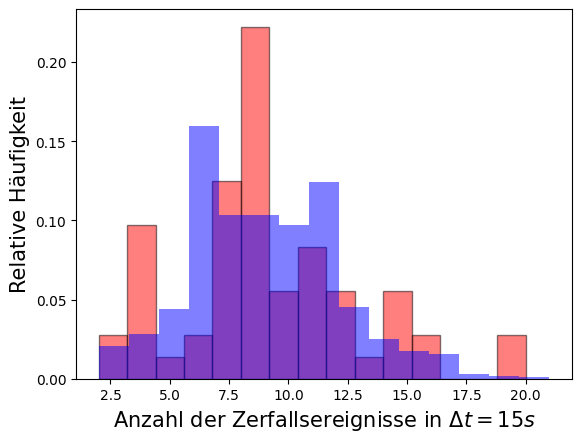

In [67]:
from scipy import stats
plt.hist(df["Events"], color="red", label="Data", edgecolor="black", density=True, bins=15, alpha=0.5)
poisValues = stats.poisson.rvs(mu=n_bar/15, size=1000)
plt.hist(poisValues, density=True, color="blue", label="Poisson Verteilung", bins=15, alpha=0.5)
normValues=np.random.normal(n_bar/15, n_bar_uncert/15, 200)
#plt.hist(normValues, density=True, color="green", label="Gauß Verteilung", bins=15, alpha=0.5)
plt.xlabel(r'Anzahl der Zerfallsereignisse in $\Delta t=15s$', size=15)
plt.ylabel('Relative Häufigkeit', size=15)
plt.show()

In [62]:
poisValues

array([10,  6,  5, 14, 12, 10,  5, 15, 13, 12,  6, 10, 12,  9, 12,  3,  6,
       10,  7,  8,  6, 10,  8,  8, 10,  7,  9,  8,  9,  3,  9,  1,  9,  9,
        7,  8, 11, 11,  8, 11, 11,  8, 12,  6,  8, 12,  3,  8, 10, 11, 17,
        5,  2,  7,  7,  9, 14,  7, 10,  7,  6,  5, 10,  5,  9, 13,  9, 10,
        9,  7, 11, 12,  8, 12,  7,  7, 10,  7, 10, 11,  7, 13,  6, 10,  5,
       13,  8,  7, 12,  8, 10,  6,  9,  8,  9,  3, 10,  8,  9, 13,  5,  6,
       13,  6,  7,  6, 10, 12, 11, 12,  8, 11,  9, 11,  8, 10, 10,  8,  9,
        7, 10, 16,  8,  7,  7,  6,  4, 11, 14,  4,  7, 10, 12,  7, 11,  3,
       12,  9,  8, 14, 18,  6, 13, 10,  3, 11, 12, 11,  9,  4,  7, 10,  9,
        6, 13, 14, 11,  6, 10,  6, 11, 10,  7,  8,  3, 11,  6, 12, 11,  7,
       11, 14,  8,  8, 16, 12, 15, 13, 10,  5,  9,  7, 10,  6,  7,  8,  9,
       12,  3,  2,  5,  6, 11,  7,  5, 12, 12, 10, 11, 11, 10, 14,  9, 12,
        8,  2,  6,  6, 14, 13,  9,  7,  5,  8, 13, 11,  8,  8,  7,  8,  4,
       14,  7, 10,  5,  9